from google colab import files #匯入套件

import pandas as pd

upload = files.upload() #開啟上傳介面並載入

data = pd.read_csv("上傳檔案")


In [5]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/")
!ls -l "/content/gdrive/My Drive/112_2_LATIA/"

#匯入套件
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "./112_2_LATIA/hhw1.csv"

df = pd.read_csv(csv_file, encoding='utf-8')
# 讀取csv檔案

print(df.info(verbose=True, show_counts=True))
#查看資料欄位資訊


Mounted at /content/gdrive/
total 96
-rw------- 1 root root 92484 Apr  8 12:25 112_student.csv
-rw------- 1 root root   673 Apr  8 12:28 abc.csv
-rw------- 1 root root  2279 Apr  8 12:54 hhw1.csv
-rw------- 1 root root   528 Apr  8 12:03 hw1.csv
-rw------- 1 root root   673 Apr  8 12:38 school.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   年別              10 non-null     object 
 1   女性              10 non-null     int64  
 2   男性              10 non-null     int64  
 3   女性大專院校          10 non-null     float64
 4   男性大專院校          10 non-null     float64
 5   女性高級中等學校        10 non-null     float64
 6   男性高級中等學校        10 non-null     float64
 7   女性高級中等學校普通科     10 non-null     float64
 8   男性高級中等學校普通科     10 non-null     float64
 9   女性高級中等學校綜合高中    10 non-null     float64
 10  男性高級中等學校綜合高中    10 non-null     float64
 11  女性高級中等學校專

# 問題一：高雄市哪一年的女性高級中等學校普通科人數最多？

In [2]:
#找出想要觀看的欄位
df1 = df[['年別',"女性高級中等學校普通科"]]

#看總共有幾筆資料
num_rows = df1.shape[0]
print("本資料集共有", num_rows, "筆記錄")

# 找出 '女性高級中等學校普通科學生數' 最多的年份
max_students_year = df1['年別'][df1['女性高級中等學校普通科'].idxmax()]

# 輸出結果
print("高雄市女性高級中等學校普通科學生數最多的年份是:", max_students_year)

本資料集共有 10 筆記錄
高雄市女性高級中等學校普通科學生數最多的年份是: 2017年


# 問題二 : 高雄市男性大專院校學生數和女性大專院校學生數相差最大的是何年?

In [3]:
# 找出想要觀看的欄位，建立新dataframe
df2 = df[["年別", "女性大專院校", "男性大專院校"]]

# 計算男女大專院校學生數的差異
df2["差異"] = df2["男性大專院校"] - df2["女性大專院校"]

# 找出差異最大的年份
max_diff_year = df2["年別"][df2["差異"].idxmax()]

# 輸出結果
print("高雄市男女大專院校學生數相差最大的年份是:", max_diff_year)


高雄市男女大專院校學生數相差最大的年份是: 2013年


<ipython-input-3-b32bb5ee7770>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["差異"] = df2["男性大專院校"] - df2["女性大專院校"]


# 問題三 : 高雄市女性特殊生國中以及國小補校人數各年的總和分別是多少?

In [4]:
# 找出想要觀看的欄位，建立新dataframe
df3 = df[["年別", "女性特殊學校國中補校", "女性特殊學校國小補校"]]

# 將國中補校和國小補校的人數相加得到總和
df3["總和"] = df3["女性特殊學校國中補校"] + df3["女性特殊學校國小補校"]

# 使用 groupby 函數按照 '年別' 分組，並計算總和
sum_by_year = df3.groupby("年別")["總和"].sum()

# 輸出結果
print("各年的高雄市女性特殊生國中和國小補校總和人數：")
print(sum_by_year)

各年的高雄市女性特殊生國中和國小補校總和人數：
年別
2013年    0.56
2014年    0.47
2015年    0.45
2016年    0.43
2017年    0.44
2018年    0.45
2019年    0.42
2020年    0.42
2021年    0.35
2022年    0.31
Name: 總和, dtype: float64


<ipython-input-4-ebcbc2ab3d9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["總和"] = df3["女性特殊學校國中補校"] + df3["女性特殊學校國小補校"]


# 問題四 : 請畫出年份和女性高級中等學校綜合高中學生人數的折線圖

--2024-04-09 02:19:21--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.219.113, 172.217.219.138, 172.217.219.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.219.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-04-09 02:19:21--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.120.132, 2607:f8b0:4001:c18::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.120.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  44.6MB/s    in 0.4s    

2024-04-09 

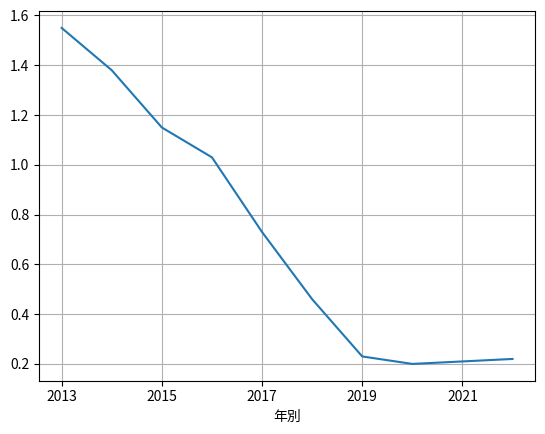

In [17]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 創建包含年份和學生人數的dict
products = {
    "年別": ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    "女性高級中等學校綜合高中學生人數": [1.55, 1.38, 1.15, 1.03, 0.73, 0.46, 0.23, 0.2, 0.21, 0.22]
}

# 將dict轉換為 DataFrame
df = pd.DataFrame(products)

# 將年份設置為 DataFrame 的索引
df.set_index('年別', inplace=True)

# 繪製折線圖
df["女性高級中等學校綜合高中學生人數"].plot(kind="line")
plt.grid(True)  # 顯示圖表的格線
plt.show()

# 問題五 : 請繪製高雄市各年與女性學生數的長條圖

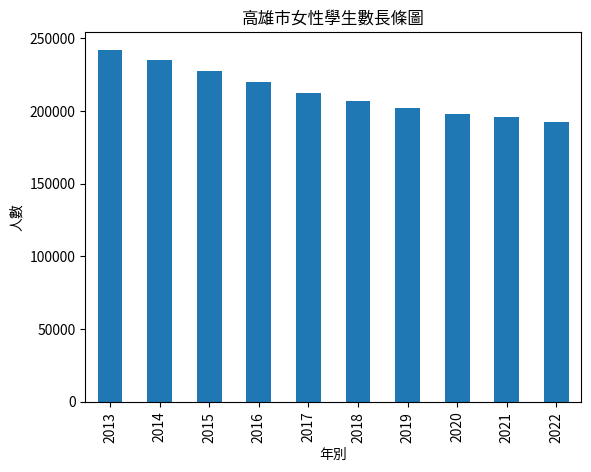

In [27]:
# 創建包含年份和學生人數的dict
products1 = {
    "年別": ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    "女性": [242010, 235312, 227637, 219979, 212458, 206498, 201813, 198065, 195729, 192224]
}

df = pd.DataFrame(products1)

# 將年份設置為 DataFrame 的索引
df.set_index('年別', inplace=True)

# 繪製垂直長條圖
df["女性"].plot(kind="bar")

#加入圖表標題
plt.xlabel("年別")
plt.ylabel("人數")
plt.title("高雄市女性學生數長條圖")

#顯示圖表
plt.show()

# 問題六 : 請繪製2022年女性不同高級中等學校類別學生人數的圓餅圖

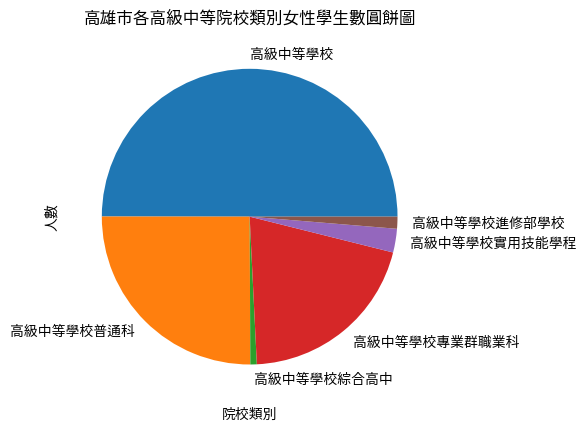

In [31]:
# 創建包含院校類別和學生人數的dict
products2 = {
    "院校類別": ["高級中等學校", "高級中等學校普通科",
           "高級中等學校綜合高中", "高級中等學校專業群職業科",
           "高級中等學校實用技能學程", "高級中等學校進修部學校"],
    "人數": [15.64, 7.85, 0.22, 6.36, 0.81, 0.41]
}

df = pd.DataFrame(products2)

# 將院校類別設置為 DataFrame 的索引
df.set_index('院校類別', inplace=True)

# 繪製圓餅圖
df["人數"].plot(kind="pie")

#加入圖表標題
plt.xlabel("院校類別")
plt.title("高雄市各高級中等院校類別女性學生數圓餅圖")

#顯示圖表
plt.show()